Here is the code for Problem 2, in this code, I have defined a class with the main functions (updating the weights and bias, train and predict) and then made 10 instances of the class as my digit classifiers. You can see the results at the bottom. I used Sigmoid as the activation function and Binary Cross Entropy Loss function.

In [2]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# data load
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

# data reshape and change to black/white image
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.0

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.0

In [4]:
# initial variables
batch_size = 600
epochs = 20
learning_rate = 1
data_size = train_images.shape[0]
dimension = train_images.shape[1]
digit_classifiers = []
models_train_accuracy = []
models_test_accuracy = []
predicted_labels_train = np.zeros((1,train_labels_original.shape[0]))
predicted_labels_test = np.zeros((1,test_labels_original.shape[0]))

In [5]:
class classifier:
    
    def __init__(self, number, batch_size, dimension, learning_rate,train_labels_original,test_labels_original):
        self.number=number
        self.weight = np.zeros((dimension, 1))
        self.bias = 0
        self.dimension = dimension
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.Label_train_binary = [1 if a == number else 0 for a in train_labels_original]
        self.Label_test_binary = [1 if a == number else 0 for a in test_labels_original]
        self.Label_train_binary = np.asarray(self.Label_train_binary)
        self.Label_test_binary = np.asarray(self.Label_test_binary)
        self.train_labels_shuffled = np.zeros((1,train_labels_original.shape[0]))
    
    def sigmoid(self, z):
        s = 1.0/(1.0 + np.exp(-z))
        return s
    
    def backward(self, X, Y):
        z = np.dot(self.weight.T,X) + self.bias
        A = self.sigmoid(z)

        gradient_weight = 1.0/self.batch_size * np.dot(X, (A-Y).T)
        gradient_bias = 1.0/self.batch_size * np.sum(A-Y)

        return gradient_weight, gradient_bias
    
    def update(self, X, Y):
        X = X.transpose()
        gradient_weight, gradient_bias = self.backward(X, Y)

        self.weight = self.weight - self.learning_rate * gradient_weight
        self.bias = self.bias - self.learning_rate * gradient_bias


    def predict (self, X):
        Y_prediction = np.zeros((1,X.shape[0]))
        X = X.transpose()

        A = self.sigmoid(np.dot(self.weight.T, X) + self.bias)
        
        return A

    def Label_shuffle(self, shuffled_indices):
        self.train_labels_shuffled = self.Label_train_binary[shuffled_indices]

    def train(self, i, xi):
        yi = self.train_labels_shuffled[i : i + self.batch_size]
        self.update(xi,yi)

In [6]:
# creating 10 classifiers
for digit in range(10):
        digit_classifiers.append(classifier(digit, batch_size, dimension, learning_rate,train_labels_original,test_labels_original))

In [7]:
# training classifiers
for epoch in range(epochs):
        Y_train_dic = []
        Y_test_dic = []
        shuffled_indices = np.random.permutation(data_size)
        train_images_shuffled = train_images[shuffled_indices]
        for digit in range(10):
                digit_classifiers[digit].Label_shuffle(shuffled_indices)
        for i in range(0, data_size, batch_size):
                xi = train_images_shuffled[i : i + batch_size]
                for digit in range(10):
                        digit_classifiers[digit].train(i,xi)
        
        for digit in range(10):
                Y_train_dic.append(digit_classifiers[digit].predict(train_images))
                Y_test_dic.append(digit_classifiers[digit].predict(test_images))

        predicted_labels_train = np.squeeze(np.argmax(Y_train_dic, axis = 0))
        predicted_labels_test = np.squeeze(np.argmax(Y_test_dic, axis = 0))

        train_accuracy = np.mean([int(i==j) for i, j in zip(predicted_labels_train, train_labels_original)]) * 100.0
        models_train_accuracy.append(train_accuracy)
        
        test_accuracy = np.mean([int(i==j) for i, j in zip(predicted_labels_test, test_labels_original)]) * 100.0
        models_test_accuracy.append(test_accuracy)

        print "epoch " + str(epoch) + " ====> train accuracy: {0:0.4f} ====> test accuracy: {1:0.4f}".format(train_accuracy, test_accuracy)

epoch 0 ====> train accuracy: 89.3267 ====> test accuracy: 89.9200
epoch 1 ====> train accuracy: 89.9633 ====> test accuracy: 90.5400
epoch 2 ====> train accuracy: 90.3017 ====> test accuracy: 90.9700
epoch 3 ====> train accuracy: 90.6333 ====> test accuracy: 91.1000
epoch 4 ====> train accuracy: 90.9567 ====> test accuracy: 91.3500
epoch 5 ====> train accuracy: 90.7033 ====> test accuracy: 91.1500
epoch 6 ====> train accuracy: 91.1833 ====> test accuracy: 91.4400
epoch 7 ====> train accuracy: 91.2950 ====> test accuracy: 91.4300
epoch 8 ====> train accuracy: 91.4850 ====> test accuracy: 91.6600
epoch 9 ====> train accuracy: 91.3967 ====> test accuracy: 91.6500
epoch 10 ====> train accuracy: 91.4667 ====> test accuracy: 91.4900
epoch 11 ====> train accuracy: 91.5233 ====> test accuracy: 91.5300
epoch 12 ====> train accuracy: 91.4667 ====> test accuracy: 91.5600
epoch 13 ====> train accuracy: 91.6400 ====> test accuracy: 91.7400
epoch 14 ====> train accuracy: 91.6850 ====> test accuracy

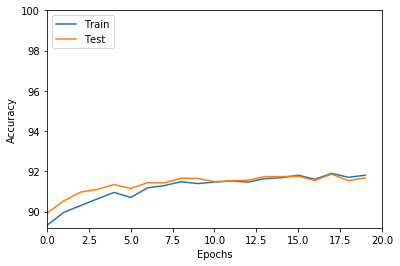

In [8]:
plt.plot(range(epochs), models_train_accuracy)
plt.plot(range(epochs), models_test_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(top = 100)
plt.xlim(0,20)
plt.show()